## Dose-Response Plotter CC=0.2

We call the libraries and the data from the experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [2]:
def load_data(filedir):
    
    mydata = np.genfromtxt(filedir,delimiter="\t")
    TotalDensity = [i[0] for i in mydata] #Total bacterial density
    Suc = [i[1] for i in mydata] #Susceptible strain total density
    Res = [i[2] for i in mydata] #Resistant strain total density
    Rel_Freq = [i[2]/(i[1]+i[2]) for i in mydata] #Resistant Relative Frequency
    Suc_win = [i[3] for i in mydata] #Number of wins of Susceptible strain
    Res_win = [i[4] for i in mydata] #Number of wins of Resistant strain
    R_S_winratio = [i[4]/(i[3]+i[4]) for i in mydata]#node-to-node Resistant WinRatio
    Netdensity = [i[6] for i in mydata] #Network density
    clustc = [i[7] for i in mydata] #Network clustering coefficient
    clo_centr = [i[8] for i in mydata] #Closeness centrality
    ant_deg = [i[9] for i in mydata] #Antibiotic source connectivity
    bet_centr = [i[10] for i in mydata] #Betweeness centrality

    d = {'TotDen':TotalDensity,'SucDen':Suc,'ResDen':Res,'Rel_Freq':Rel_Freq,
           'SucWin':Suc_win, 'ResWin':Res_win, 'R_S_winratio':R_S_winratio,
           'NetDen':Netdensity,'ClustC':clustc,'CloCentr':clo_centr,'AntDeg':ant_deg,
           'BetCentr':bet_centr}
    return pd.DataFrame(d)

In [3]:
NamesDict = {'TotDen':'Total Bacterial Density','SucDen': 'Susceptible Bacteria Density',
             'ResDen': 'Resistant Bacteria Density','Rel_Freq': 'Resistant Relative Frequency',
       'SucWin': 'Susceptible Node Winners', 'ResWin':'Resistant Node Winners', 'R_S_winratio':'Ratio of winners R/S',
       'NetDen':'Network Density','ClustC':'Global Clustering Coefficient','CloCentr':'Closeness Centrality',
        'ant_deg':'Connectivity of Antibiotic Source',
       'BetCentr':'Betweenness Centrality'}

In [4]:
sim_size=5
df_vec = [load_data("DR_N_50_meanedg_"+str(i)+"_watts_out") for i in range(1,sim_size+1)]

We generate the function for plotting many comparisons

In [5]:
def plot_Dose_on_col(column):
    [plt.plot(range(len(df_vec[i][column])),df_vec[i][column]) for i in range(sim_size)]
    plt.title("Dose-Response of Total bacterial Density (S+R)")
    plt.title("Dose effect on "+column+" when increasing Mean Edges",y=1.08)
    plt.legend([str(i*2) for i in range(1,sim_size+1)],loc='best',title="Mean Edges")
    
    plt.savefig("Figures/Dose_incME_"+column+"CC0.2.png")
    plt.show()


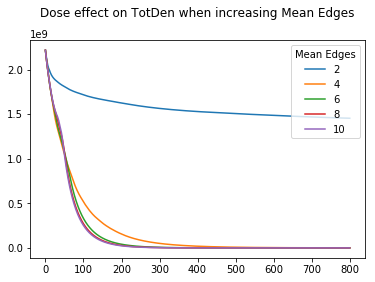

In [6]:
plot_Dose_on_col('TotDen')

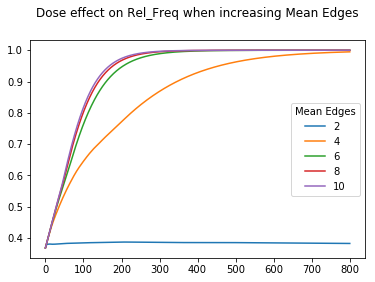

In [7]:
plot_Dose_on_col('Rel_Freq')

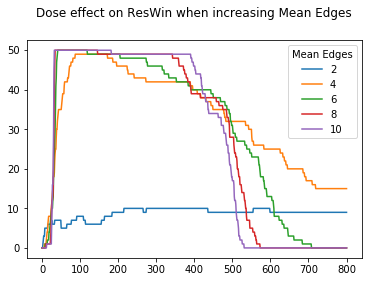

In [8]:
plot_Dose_on_col('ResWin')

## Analysis of Relative Frequency AND Density

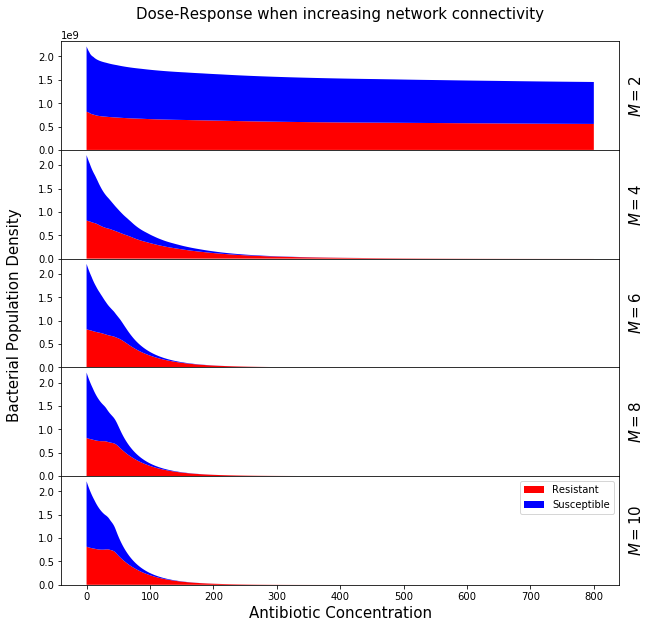

In [9]:
fontsize=15
sim_size = 5
f, ax_vec = plt.subplots(sim_size, sharex=True, sharey=False, figsize=(10,10))

for i in range(sim_size):
    ax = ax_vec[i]
    ax.stackplot(range(len(df_vec[i]['Rel_Freq'])),df_vec[i].ResDen,df_vec[i].SucDen,colors=['red','blue'])
    
    
    ax.annotate(r'$M=%d$' % ((i+1)*2), xy=(1.03,0.5), rotation=90,
                        ha='center',va='center',xycoords='axes fraction', fontsize=fontsize)
    if i==0:
        ax.set_title('Dose-Response when increasing network connectivity',y=1.15,fontsize=fontsize)
    else:
        ax.yaxis.get_offset_text().set_visible(False)
        if i==sim_size-1:
            ax.legend(['Resistant','Susceptible'])
    
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(wspace=0,hspace=0)
plt.xlabel("Antibiotic Concentration",fontsize=fontsize)
f.text(0.05, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.savefig("Figures/DR_varME_2to8_CC0.2.png")
plt.show()

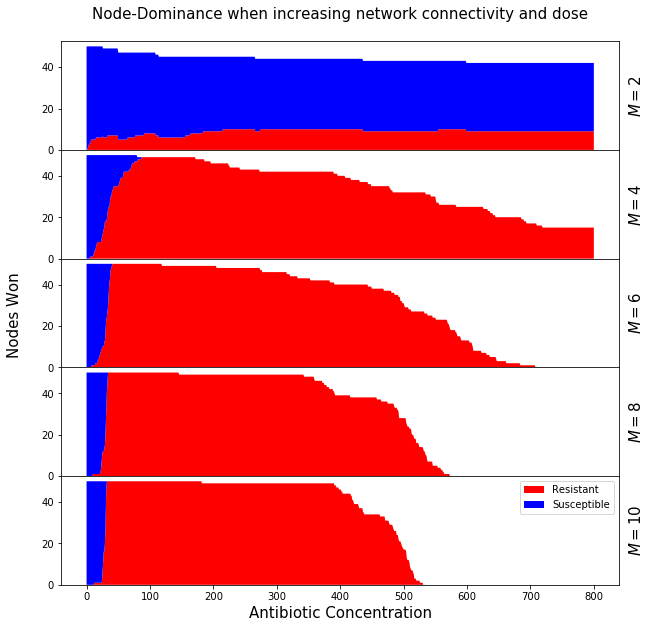

In [10]:
fontsize=15
sim_size = 5
f, ax_vec = plt.subplots(sim_size, sharex=True, sharey=False, figsize=(10,10))

for i in range(sim_size):
    ax = ax_vec[i]
    ax.stackplot(range(len(df_vec[i]['Rel_Freq'])),df_vec[i].ResWin,df_vec[i].SucWin,colors=['red','blue'])
    
    
    ax.annotate(r'$M=%d$' % ((i+1)*2), xy=(1.03,0.5), rotation=90,
                        ha='center',va='center',xycoords='axes fraction', fontsize=fontsize)
    if i==0:
        ax.set_title('Node-Dominance when increasing network connectivity and dose',y=1.15,fontsize=fontsize)
    else:
        ax.yaxis.get_offset_text().set_visible(False)
        if i==sim_size-1:
            ax.legend(['Resistant','Susceptible'])
    
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(wspace=0,hspace=0)
plt.xlabel("Antibiotic Concentration",fontsize=fontsize)
f.text(0.05, 0.5, 'Nodes Won', va='center', rotation='vertical',fontsize = fontsize)

plt.savefig("Figures/DRWin_varME_2to8_CC0.2.png")
plt.show()